In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Iris.csv')


In [4]:
df.shape


(150, 6)

In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,102,5.8,2.7,5.1,1.9,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica
137,138,6.4,3.1,5.5,1.8,Iris-virginica


In [6]:
df.columns = df.columns.str.strip()  # Removes leading and trailing spaces


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


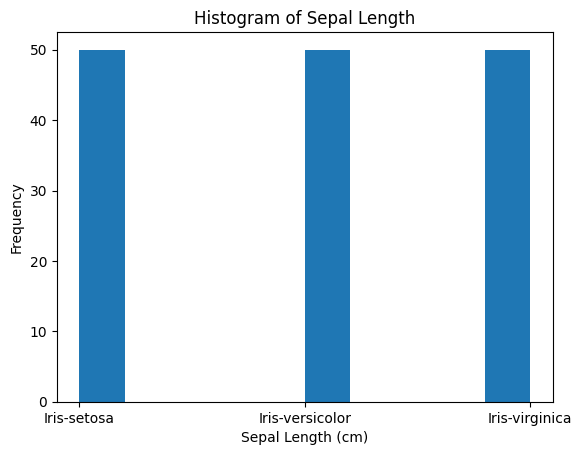

In [8]:
plt.hist(df['Species'])
# Adding titles and labels
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [9]:
# Create a mapping dictionary
species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

# Convert species to numerical values
df['species_numeric'] = df['Species'].map(species_mapping)



In [10]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_numeric
105,106,7.6,3.0,6.6,2.1,Iris-virginica,2
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,1
62,63,6.0,2.2,4.0,1.0,Iris-versicolor,1
81,82,5.5,2.4,3.7,1.0,Iris-versicolor,1
14,15,5.8,4.0,1.2,0.2,Iris-setosa,0


In [11]:
correlation_matrix = df.select_dtypes(include=['number']).corr()


In [12]:
correlation_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_numeric
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
species_numeric,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [13]:
type(df)

pandas.core.frame.DataFrame

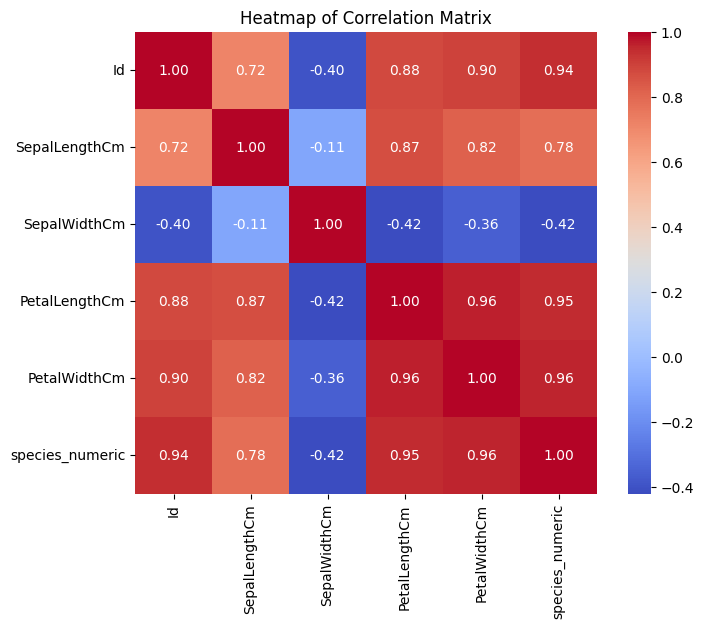

In [14]:
# Draw heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [15]:
df = df.drop(columns=['Id', 'SepalWidthCm'])

In [16]:
df.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species,species_numeric
0,5.1,1.4,0.2,Iris-setosa,0
1,4.9,1.4,0.2,Iris-setosa,0
2,4.7,1.3,0.2,Iris-setosa,0
3,4.6,1.5,0.2,Iris-setosa,0
4,5.0,1.4,0.2,Iris-setosa,0


In [17]:
df = df.drop(columns=['Species'])


In [18]:
df.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,species_numeric
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [19]:
# Separate input features (X) and target variable (y)
x = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Only the last column

In [20]:
x.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_numeric, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [23]:
x_train

,SepalLengthCm,PetalLengthCm,PetalWidthCm
126,6.2,4.8,1.8
23,5.1,1.7,0.5
64,5.6,3.6,1.3
117,7.7,6.7,2.2
84,5.4,4.5,1.5
...,...,...,...
75,6.6,4.4,1.4
43,5.0,1.6,0.6
22,4.6,1.0,0.2
72,6.3,4.9,1.5


In [32]:
y_train

126    2
23     0
64     1
117    2
84     1
      ..
75     1
43     0
22     0
72     1
15     0
Name: species_numeric, Length: 120, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score

# Define a base Decision Tree Classifier with a fixed random_state
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [25]:
# Get the best parameters and evaluate the model
best_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Test the model
y_pred = best_clf.predict(x_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [27]:
y_test.values

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [28]:
from sklearn.metrics import  classification_report
# Evaluate the model
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Data: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [29]:

from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# For example, calculating for class 0 (Setosa)
TP_setosa = cm[0, 0]  # True Positives for class 0
FP_setosa = cm[1, 0] + cm[2, 0]  # False Positives for class 0
FN_setosa = cm[0, 1] + cm[0, 2]  # False Negatives for class 0
TN_setosa = cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2]  # True Negatives for class 0

# Print the values
print("Class 0 (Setosa) - TP:", TP_setosa, "FP:", FP_setosa, "FN:", FN_setosa, "TN:", TN_setosa)

# Similarly, for class 1 (Versicolor)
TP_versicolor = cm[1, 1]
FP_versicolor = cm[0, 1] + cm[2, 1]
FN_versicolor = cm[1, 0] + cm[1, 2]
TN_versicolor = cm[0, 0] + cm[2, 2]

# Print the values for Versicolor
print("Class 1 (Versicolor) - TP:", TP_versicolor, "FP:", FP_versicolor, "FN:", FN_versicolor, "TN:", TN_versicolor)

# Similarly, for class 2 (Virginica)
TP_virginica = cm[2, 2]
FP_virginica = cm[0, 2] + cm[1, 2]
FN_virginica = cm[2, 0] + cm[2, 1]
TN_virginica = cm[0, 0] + cm[1, 1]

# Print the values for Virginica
print("Class 2 (Virginica) - TP:", TP_virginica, "FP:", FP_virginica, "FN:", FN_virginica, "TN:", TN_virginica)


Class 0 (Setosa) - TP: 14 FP: 0 FN: 0 TN: 16
Class 1 (Versicolor) - TP: 7 FP: 1 FN: 1 TN: 21
Class 2 (Virginica) - TP: 7 FP: 1 FN: 1 TN: 21
